<h4><center> Irina Ivanovska 617258  irina.ivanovska@student.hu-berlin.de</center></h4>
<br>
<h3><center> Assignment </center></h3>
<h2><center><b> Applied Predictive Analytics</b></center></h2>
<h1><center><b>Predictions of customer returns </b></center></h1>

<h3><b> 1. Introduction </b></h3>
<br>
<h4> <b>1.1 Market Relevance </b></h4>
<br>
<div style="text-align: justify">Over the last few years online shoping has witnessed widespread adoption. Advancements in technologies and high internet penetrations, that for sure enable a wide variety of product choices while enjoying the comfort of our homes, are some of the many reasons for the growing popularity of it. In many cases, virtual shops have better return policies than the local stores, which explains why at least 30% of all online ordered products are returned as opposed to less than 9% in the local stores [1]. In addition, there are statistics showing that 40% of the customers make an order of more items with the intention of returning some of the purchased products and that 47% will not buy a certain item if the return shipping is not free. This attitude of the consumers is a painful headache for the businesses which is estimated to cost them around $550 bilion [2]. Indeed, taking the return turns out to be more costly than just issuing the refund and letting the consumer keep the item. However, by observing the consumers' attitude one can identify the items that are likely to be returned and possibly restrict payment options, lower the discount value which can therefore result in 50% of the consumers wanting to cancel their purchase. <br>Hence, we come to the  purpose of this assigment,  which is to identify the items that are likely to be returned by analysing real-world data collected from June 2016 to September 2016 by an online retailer.
On that wise, by building a model which will estimate if a customer will return an item within a certain order, the potential sales and the return risk of them will be balanced and will therefore optimize the shop's revenue. This is needed, especially now, in times of a pandemic, as people worldwide are particularly cautious of crowded physical stores or mostly unable to visit them. Hence, online shopping is embraced more then ever.</div>
<br>
<h4><b> 1.2 Data Overview </b></h4>
<br>
<div style="text-align: justify">This dataset includes records that have information about the order and delivery date of the item as well as the ID, size, color, price and the brand ID of that item. Moreover, since the goal is to predict possible returns, we must also have insight into the profile of the customers. Therefore, this dataset also contains the users's ID, title, date of birth, state and registration date. Finally, in comparison to the unkown data, the known data contains one more column, the target variable - return. </div>
<br>
<h4><b> 1.3 Research Design </b></h4>
<br>
<div style="text-align: justify">In order to get more familiar with the data, I will firstly perform an Exploratory Data Analysis (EDA). This might reveal some patterns that occure within the data and detect outliers or anomalous events. Right after that, I will proceed on to extracting relevant features from the data, which is crucial to improve the chosen models' performance. Each of these models will be analysed and I will explore ways to improve the accuracy.  Lastly, before summarizing all results and choosing the best model, I will evaluate the models based on their financial costs. </div>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports
import warnings
with warnings.catch_warnings():
  warnings.filterwarnings('ignore')
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import matplotlib.cm as cm
  from plotnine import ggplot, aes, geom_line, geom_col, geom_bar, theme, element_text, geom_text, position_stack, scale_fill_brewer
  import datetime
  from dateutil.relativedelta import relativedelta
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import train_test_split
  import math
  from pandas.api.types import is_numeric_dtype
  from matplotlib.colors import ListedColormap
  import seaborn as sns
  import math
  from sklearn.metrics import classification_report, confusion_matrix
  from sklearn import svm
  import plotly.tools as tls
  import plotly.express as px
  import statsmodels.api as sm
  from sklearn.linear_model import LogisticRegression
  from sklearn import metrics, tree
  from sklearn.preprocessing import binarize
  from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV,StratifiedKFold, cross_validate 
  from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report,roc_curve, auc, roc_auc_score
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.naive_bayes import GaussianNB
  from numpy import mean
  from sklearn.tree import DecisionTreeClassifier
  from imblearn.under_sampling import RandomUnderSampler

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/BADS_WS2021_known.csv',  encoding='utf8')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/BADS_WS2021_unknown.csv',  encoding='utf8')

<h3><b> 2. Exploratory Data Analysis </b></h3>
<br>
<div style="text-align: justify"> In this part, as already mentioned, I will analyse the contents of this dataset in depth. To begin with, I have observed that there are some missing values. While an obvious step might have been to disregard rows that contain such values, I have decided to keep them. Moreover, there seem to be some columns that are said to be of type int i.e., numerical variables, when instead are categorical and should be of type object (ex. identifier variables). That being the case, I have changed the data types of the item_id, brand_id, user_id and return. 
<br>
<br> I have also checked for duplicates in the dataset. Since they were not any, I went ahead and checked the distribution of some variables. After converting the strings to datetime, the first on the list was the buyer's date of birth (user_dob variable). From its distribution one could reason that some values of this attribute are certainly not possible (ex. a person born in 1900 that is still alive and orders online in 2016). Therefore, when I did feature engineering, under the assumption that people older than 76 years are too old to purcase online, I got rid of these outliers by removing all customers with birthday dates before '01.01.1940'. In addition, those born after '01.01.2000' were also excluded. 
</div>


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_item_id  100000 non-null  int64  
 1   order_date     100000 non-null  object 
 2   delivery_date  90682 non-null   object 
 3   item_id        100000 non-null  int64  
 4   item_size      100000 non-null  object 
 5   item_color     100000 non-null  object 
 6   brand_id       100000 non-null  int64  
 7   item_price     100000 non-null  float64
 8   user_id        100000 non-null  int64  
 9   user_title     100000 non-null  object 
 10  user_dob       91275 non-null   object 
 11  user_state     100000 non-null  object 
 12  user_reg_date  100000 non-null  object 
 13  return         100000 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 10.7+ MB


In [ ]:
categorical_vars = ['item_id','brand_id','user_id']
train[categorical_vars] = train[categorical_vars].astype(str)
train['return'] = train['return'].astype(str)
test[categorical_vars] = test[categorical_vars].astype(str)

In [ ]:
duplicate_rows = train[train.duplicated()]
print("number of duplicate rows:", duplicate_rows.shape)

number of duplicate rows: (0, 14)


In [ ]:
dataset = train.copy(deep=True)
dataset["delivery_date"] = pd.to_datetime(dataset.delivery_date, infer_datetime_format=True)
dataset["order_date"] = pd.to_datetime(dataset.order_date, infer_datetime_format=True)
dataset["user_dob"] = pd.to_datetime(dataset.user_dob, infer_datetime_format=True)
dataset["user_reg_date"] = pd.to_datetime(dataset.user_reg_date,infer_datetime_format=True)

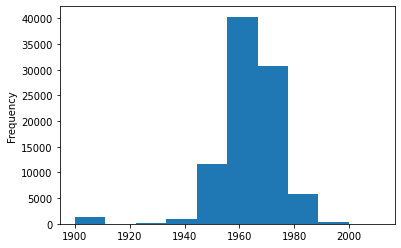

In [ ]:
dataset['user_dob'].map(lambda d: d.year).plot(kind='hist')
plt.show()

<div style="text-align: justify"> Next, I was interested in getting some insights into the distribution of the prices per item, it's central value and variablility. This was nicely shown with the use of a box plot. The majority of the items are priced bellow hundred dollars. However, there are also a number of items that have a price range between 200 - 300 dollars and others with prices of $1000. </div>

Text(0.5, 0, 'Price per item')

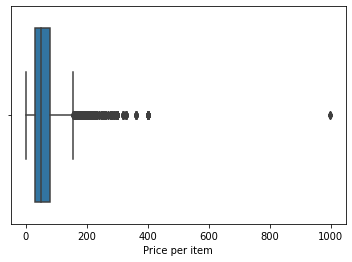

In [ ]:
ax = sns.boxplot(x=dataset['item_price'])
ax.set_xlabel('Price per item')

<div style="text-align: justify"> Moreover, I was also curious to see if the prices differ by the User's Title and State, which is why I have grouped the customers by their title and showed how different are the prices with respect to their state. The figure below provides a nice visualization regarding that matter. Firstly, it shows that the consumers whose title is 'Mrs' are the most frequent buyers overall, hence the high values of item_prices for this category of the 'user_title' feature. Secondly we can see how much money were spent per 'user_title' in each of the states. Lastly, the distribution of the 'user_state' attribute showed that the users coming from North Rhine-Westphalia have spend 1.5 milion dollars for all the items purchased, thus bringing this state to the first place on the biggest spender state scale. It should be noted that one fifth of the customers come from this state, which surely explains the high total item_price value.</div>

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



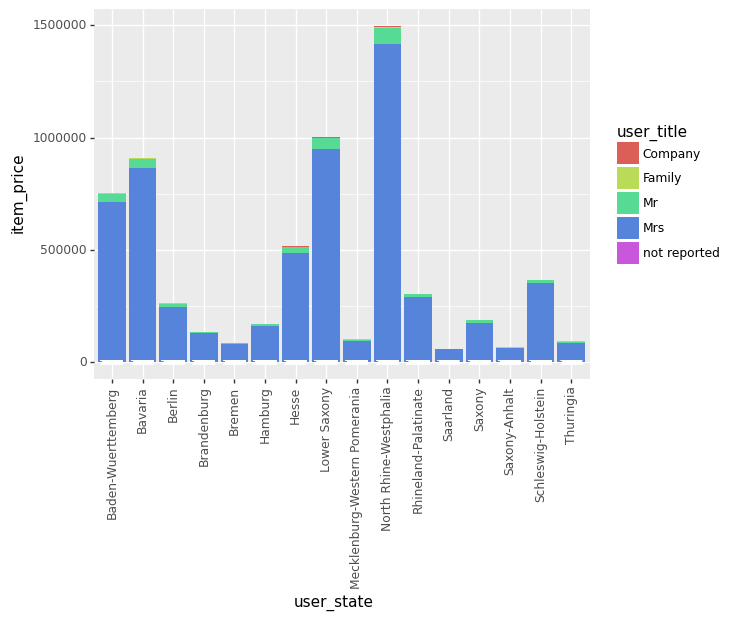

<ggplot: (8780075213901)>

In [ ]:
plot = ggplot(data = dataset, mapping = aes(x='user_state', y='item_price', fill='user_title')) + geom_col()
plot + theme(axis_text_x = element_text(angle = 90, hjust = 0.5)) + geom_text(aes(label='item_price'),colour = "white", size = 5)

<div style="text-align: justify"> In addition, since we want to predict possible returns of the items, it is indeed benefitial to get more familir with the return variable itself and take a closer look at the purchase behaviour and return decision of the different groups of people. For example, customers that are buying for a company have a higher rate of return when compared to family customers.

Text(0, 0.5, 'Proportion of Customers')

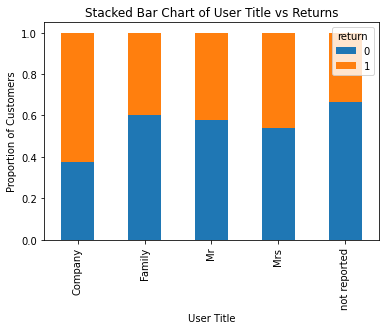

In [ ]:
table=pd.crosstab(dataset.user_title,dataset["return"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of User Title vs Returns')
plt.xlabel('User Title')
plt.ylabel('Proportion of Customers')

<div style="text-align: justify"> As for the return per state, one could easily notice that higher priced items have a tendency to be returned.</div>

In [ ]:
dataset.groupby(["user_state", "return"])["item_price"].mean()

user_state                     return
Baden-Wuerttemberg             0         56.832339
                               1         69.749219
Bavaria                        0         59.347948
                               1         74.755047
Berlin                         0         58.473889
                               1         71.308737
Brandenburg                    0         57.295387
                               1         66.011553
Bremen                         0         58.263665
                               1         79.088550
Hamburg                        0         60.559294
                               1         74.898487
Hesse                          0         61.305566
                               1         75.747883
Lower Saxony                   0         59.471602
                               1         73.786735
Mecklenburg-Western Pomerania  0         57.070327
                               1         68.061210
North Rhine-Westphalia         0         59.

<div style="text-align: justify"> Last but not least, I also checked the average delivery time. More than 85% of the participants had a positive value for the days between the date of order and the item's delivery. As we can observe from the box plot, the median value is 3 days. However, there is also data where the order date is said to be later than the delivery date and some very unusuall values for delivery time in general. In order to keep this data, their delivery dates in the feature engineering part will be set to be the mean from the positive values of the delivery days. </div>

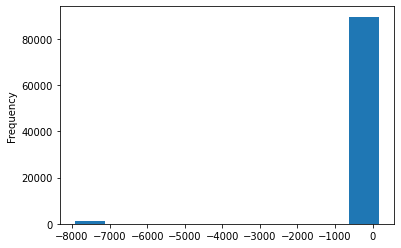

In [ ]:
del_time = []
for i in range (dataset.delivery_date.size):
    del_time.append((dataset.delivery_date[i] - dataset.order_date[i]).days)
dataset.insert(2,"del_time",del_time)
plt.clf()
dataset.del_time.plot(kind='hist')
plt.show()

(-20.0, 100.0)

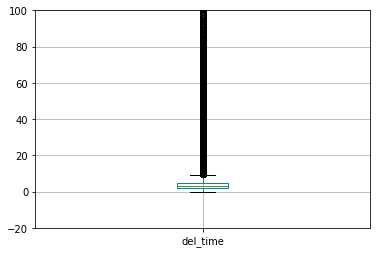

In [ ]:
boxplot = dataset.boxplot(column=['del_time'])
boxplot.set_ylim(-20,100)

<h3><b> 3. Cleaning Data and Feature Engineering </b></h3>
<br>
<div style="text-align: justify">The goal in this part is to transform the given data in a way which could be easier to interpret and which will increase the performance of the machine learning models. For example, having an integer variable for the waiting days between the order date and delivery date instead of using these two date formats is a nice alternative that still contains the needed information and can be easier to work with, as it does not need additional processing and can be directly given to the model. Before discarding these dates, I also calculated how old was the customer at the moment of purchase (in years). In addition, I computed the registration days, which will indicate how many days was the user registered before purchasing a product.  
<br>
<br>What has also been done, was splitting the order and delivery date variables into four integer features representing the year, month, day and day of the week. This can sometimes lead to discovering certain paterns in the data, such as, a bigger tendency to buy products on the weekends or holidays. In this case, I spotted that there was a higher number of people who order products on monday. However, in the later stages i.e, after performing the Weight of Evidence analysis and while training the models, I have found out that some of these featurese have inconsiderable predictive power or are bad for the model. But let's not get ahead of time.
<br>
<br>
Also, It should be noted that in the cases where 'delivery_date' was before 'order_date' or had missing values, I have substituted these values with the mean value of the delivery days, which did not take into account the above described values in the first place.
<br> 
<br>
Another way to treat missing values in a categorical feature is to introduce a new feature, which is why I have created a new variable called 'na_delivery'. Now, in all the cases where the 'delivery_date' is NA, this new variable 'na_delivery' will be set to true, value 1, and otherwise will have a value of 0.
<br>
<br>
As for the user's date of birth values that were before the date 01.01.1940, after the date 01.01.2000 or were simply missing, I have inserted the mid-range date of the array of birthday dates, which, again as above, did not consist of values belonging in these three categories. 
</div>

In [ ]:
#calculating days between two dates
def days_between(d1, d2) :
    return abs((d2-d1).days)

#converting date into date format
def timeFeatures(data):
    data["delivery_date"] = pd.to_datetime(data.delivery_date)
    data["order_date"] = pd.to_datetime(data.order_date)
    data["user_dob"] = pd.to_datetime(data.user_dob)
    data["user_reg_date"] = pd.to_datetime(data.user_reg_date)

  ##generating mean delivery time
    list_train = []
    for i in range(data.order_item_id.size):
        if data.delivery_date[i] is not pd.NaT and data.delivery_date[i] >=data.order_date[i]:
            list_train.append((days_between(data.order_date[i], data.delivery_date[i])))
    meanDelivery = pd.DataFrame(list_train).mean()
    meanDelivery = meanDelivery.apply(pd.to_numeric)

  ## new time related features
    data.insert(1,"na_delivery",0)
    for i in range (data.order_item_id.size):
        data["na_delivery"][i] = np.where(data["delivery_date"][i] is pd.NaT, 1, 0 )

    for i in range (data.order_item_id.size):
        if data.delivery_date[i] <  data.order_date[i] or  data.delivery_date[i] is pd.NaT:
            data.delivery_date[i] = data.order_date[i] + datetime.timedelta(days = int(meanDelivery))

    days = [] 
    for i in range(data.order_item_id.size):
        days.append((data.delivery_date[i] - data.order_date[i]).days)
    data.insert(1,"delivery_days",days) ##new column delivery days
  
    date_str_min = '01-01-1940'
    date_str_min = pd.to_datetime(date_str_min, format = '%m-%d-%Y')
    date_str_max = '01-01-2000'
    date_str_max = pd.to_datetime(date_str_max, format = '%m-%d-%Y')
    for i in range (data.order_item_id.size):
        if data.user_dob[i] is pd.NaT or data.user_dob[i] < date_str_min or data.user_dob[i]>date_str_max:
            data.user_dob[i] = data.user_dob.min() + (data.user_dob.max()-data.user_dob.min()) /2
  ##how old was the buyer at the moment of purcase 
    user_age = []
    for i in range (data.order_item_id.size):
        user_age.append(data.order_date[i].year - data.user_dob[i].year)
    data.insert(2,"user_age",user_age)
    
  ## how much time is the user registered before buying a product
    user_timeDays = []
    for i in range (data.order_item_id.size):
        user_timeDays.append((data.user_reg_date[i] - data.order_date[i]).days)
    data.insert(6,"user_timeRegDays",user_timeDays)
  ## year month and day of order_date
    data.insert(7,"order_year",((data.order_date).dt.year))
    data.insert(8,"order_month",((data.order_date).dt.month))
    data.insert(9,"order_day",((data.order_date).dt.day))
    data.insert(10,"order_dayofweek",((data.order_date).dt.dayofweek))
  ## year month and day of user registered
    data.insert(7,"delivery_year",((data.delivery_date).dt.year))
    data.insert(8,"delivery_month",((data.delivery_date).dt.month))
    data.insert(9,"delivery_day",((data.delivery_date).dt.day))
    data.insert(10,"delivery_dayofweek",((data.delivery_date).dt.dayofweek))

    del data['user_reg_date']
    del data['delivery_date']
    del data['user_dob']
    del data['order_date']

    return data  

<div style="text-align: justify">This dataset had a vast variety of different item sizes which are used in different continents. Therefore, I have decided to create several new variables, all conected to the item size. To begin with, one variable will describe the item's size (whether it is unsized, half sized, has a numeric or a letter size). Moreover, I also came up with a new variable explaining the origin of the item size. And then, in order to have all item sizes in one sizing system (I will use the standard international one with sizes from xs to xxxl and an additional child size), the 'item_size_num' variable together with the 'item_sizeOrigin' will be used to calculate the items' sizes.</div>

In [ ]:
#clean the sizes
def countDigits(x):
    digits=0
    x=int(x)
    if x>0:
        digits = int(math.log10(x))+1
    else:
        digits = 1
    return digits
def cleanAllSizes(data) :
    data.insert(10,"item_desc","")
    item_desc = []

    for i in range(data.order_item_id.size):
        size = data.item_size[i]
        size = size.lower()
        if size.isalpha() and size!= "unsized":
            data.item_desc[i] = "letterSize"
        elif size.isdigit():
            if countDigits(size) <= 2:
                data.item_desc[i] = "nummericSize"
            else :
                data.item_desc[i] = "bigNum"
        elif size == "unsized":
            data.item_desc[i] = "unsized"
        elif  size.endswith('+'):
            data.item_desc[i] = "halfSize"
    data.insert(10,"item_size_num",0)
    
##geting rid of the "+", having only int values and 000 for letters, big num and unsized
    for i in range(data.order_item_id.size):
        if data.item_desc[i] == "nummericSize":
            data.item_size_num[i] = int(data.item_size[i])
        elif data.item_desc[i]=="halfSize":
            data.item_size_num[i] = int(data.item_size[i][:-1])
        else :
            data.item_size_num[i] = 000
            
## creating a new column Origin of the item size
    data.insert(11,"item_sizeOrigin", "")
    for i in range(data.order_item_id.size):
        if data.item_size_num[i] == 000:
            data.item_sizeOrigin[i] = "countryUnknown"
        elif data.item_size_num[i] > 20 and data.item_size_num[i] < 50: ## EU charts
            data.item_sizeOrigin[i] = "EU"
        elif data.item_size_num[i] <= 20:
            data.item_sizeOrigin[i] = "US"
        else :
            data.item_sizeOrigin[i] = "contryOther"
## rewriting item_size
    for i in range(data.order_item_id.size):
        if data.item_sizeOrigin[i] == "EU" and data.item_size_num[i] >= 46:
            data.item_size[i]="xxxl"
        elif data.item_sizeOrigin[i] == "EU" and data.item_size_num[i] >= 44 and data.item_size_num[i] < 46:
            data.item_size[i]="xxl"
        elif data.item_sizeOrigin[i] == "EU" and data.item_size_num[i] >= 42 and data.item_size_num[i] < 44:
            data.item_size[i]="xl"
        elif data.item_sizeOrigin[i] == "EU" and data.item_size_num[i] >= 40 and data.item_size_num[i] < 42:
            data.item_size[i]="l"
        elif data.item_sizeOrigin[i] == "EU" and data.item_size_num[i] >=38 and data.item_size_num[i] < 40:
            data.item_size[i]="m"
        elif data.item_sizeOrigin[i] == "EU" and data.item_size_num[i] >= 36 and data.item_size_num[i] < 38:
            data.item_size[i]="s"
        elif data.item_sizeOrigin[i] == "EU" and data.item_size_num[i] >=32 and data.item_size_num[i] < 36:
            data.item_size[i]="xs"
        elif data.item_sizeOrigin[i] == "EU" and data.item_size_num[i] < 31:
            data.item_size[i]="child"
        elif data.item_sizeOrigin[i] == "US" and data.item_size_num[i] >= 19 and data.item_size_num[i] <= 20:
            data.item_size[i]="xxxl"
        elif data.item_sizeOrigin[i] == "US" and data.item_size_num[i] >= 17 and data.item_size_num[i] < 19:
            data.item_size[i]="xxl"
        elif data.item_sizeOrigin[i] == "US" and data.item_size_num[i] >= 15 and data.item_size_num[i] < 17:
            data.item_size[i]="xl"
        elif data.item_sizeOrigin[i] == "US" and data.item_size_num[i] >= 11 and data.item_size_num[i] < 15:
            data.item_size[i]="l"
        elif data.item_sizeOrigin[i] == "US" and data.item_size_num[i] >= 7 and data.item_size_num[i] < 11:
            data.item_size[i]="m"
        elif data.item_sizeOrigin[i] == "US" and data.item_size_num[i] >= 3 and data.item_size_num[i] < 7:
            data.item_size[i]="s"
        elif data.item_sizeOrigin[i] == "US" and data.item_size_num[i] >= 0 and data.item_size_num[i] < 3:
            data.item_size[i]="xs"
        elif data.item_size_num[i] and  data.item_size_num[i] < 164: ##child clothing size in cm
            data.item_size[i]="child"
        else :
            data.item_size[i]="other"
    return data 

<div style="text-align: justify">In addition, I have created several other features, namely, the 'userActivity', 'moneyTotal' and 'brandFrequency' features. As the names are implying, 'userActivity' explains how active the user is, 'moneyTotal' is the total amount of money that a user has spent in the time frame of collecting the data and the 'brandFrequency' feature is describing how often a brand is purchased.

In [ ]:
## new feature describing how active a user is
def userActivityFeature(data):
    userCount={}
    for i in range (data.user_id.size):
        if data.user_id[i] in userCount:
            userCount[data.user_id[i]] += 1
        else :
            userCount[data.user_id[i]] = 1
    data.insert(12,"userActivity","")
    for i in range (data.user_id.size):
        if userCount[data.user_id[i]] <= 1:
            data.userActivity[i] = "once"
        elif userCount[data.user_id[i]] > 1 and  userCount[data.user_id[i]] <= 5:
            data.userActivity[i] = "quiteLow"
        elif userCount[data.user_id[i]] > 5 and  userCount[data.user_id[i]] <= 10:
            data.userActivity[i] = "moderateLow"
        elif userCount[data.user_id[i]] > 10 and  userCount[data.user_id[i]] <= 20:
            data.userActivity[i] = "middle"
        elif userCount[data.user_id[i]] > 20 and  userCount[data.user_id[i]] <= 40:
            data.userActivity[i] = "middleHigh"
        elif userCount[data.user_id[i]] > 40:
            data.userActivity[i] = "highActivity"
##new feature describing how much money a user spent
    moneyTotal={}
    data.insert(13,"moneyTotal",0)
    for i in range (data.user_id.size):
        if data.user_id[i] in moneyTotal:
            moneyTotal[data.user_id[i]] += data.item_price[i]
        else:
            moneyTotal[data.user_id[i]] = data.item_price[i]
    for i in range (data.user_id.size):
        data.moneyTotal[i] = moneyTotal[data.user_id[i]] 

    return data
   

In [ ]:
#extract new feature out of brand_id
def brandFeature(data):
    brandCount={}
    for i in range (data.brand_id.size):
        if data.brand_id[i] in brandCount:
            brandCount[data.brand_id[i]] += 1
        else :
            brandCount[data.brand_id[i]] = 1
    data.insert(14,"brandFrequency","")
    for i in range (data.brand_id.size):
        if brandCount[data.brand_id[i]] <= 1:
            data.brandFrequency[i] = "oneTime"
        elif brandCount[data.brand_id[i]] > 1 and brandCount[data.brand_id[i]] <= 15:
            data.brandFrequency[i] = "veryLow"
        elif brandCount[data.brand_id[i]] > 15 and brandCount[data.brand_id[i]] <= 100:
            data.brandFrequency[i] = "low"
        elif brandCount[data.brand_id[i]] > 100 and brandCount[data.brand_id[i]] <= 200:
            data.brandFrequency[i] = "lowMedium"
        elif brandCount[data.brand_id[i]] > 200 and brandCount[data.brand_id[i]] <= 300:
            data.brandFrequency[i] = "mediumLow"
        elif brandCount[data.brand_id[i]] > 300 and brandCount[data.brand_id[i]] <= 500:
            data.brandFrequency[i] = "medium"
        elif brandCount[data.brand_id[i]] > 500 and brandCount[data.brand_id[i]] <= 1500:
            data.brandFrequency[i] = "mediumHigh"
        elif brandCount[data.brand_id[i]] > 1500 and brandCount[data.brand_id[i]] <= 3000:
            data.brandFrequency[i] = "medium" 
        elif brandCount[data.brand_id[i]] > 3000 and brandCount[data.brand_id[i]] <= 5000:
            data.brandFrequency[i] = "high"  
        elif brandCount[data.brand_id[i]] > 5000:
            data.brandFrequency[i] = "veryHigh"
    return data

<div style="text-align: justify">The 'item_color' variable as it was given, was rather messy to work it. To begin with, there were colors that occured only a few times and some spelling mistakes into the bargain. Along with that, there were some really similar colors that could easily be grouped. In the end, with a bit of cleaning around, I grouped all the values into 8 colors.</div>

In [ ]:
def cleanColors(data):
    myDict_colours = {
        **dict.fromkeys(['green', 'olive', 'pallid', 'dark oliv', 'avocado', 'jade', 'mint', 'nature'], 'green'), 
        **dict.fromkeys(['grey', 'dark grey', 'ash', 'silver', 'anthracite', 'basalt', 'ebony'], 'grey'),
        **dict.fromkeys(['orange', 'cognac', 'copper coin', 'gold', 'ocher', 'curry', 'yellow', 'mango'], 'yellow hues'),
        **dict.fromkeys(['blue', 'navy', 'denim', 'blau', 'aqua', 'cobalt blue', 'azure', 'turquoise', 'petrol', 'aquamarine', 'darkblue', 'dark navy', 'baltic blue', 'dark denim'], 'blue'),
        **dict.fromkeys(['mocca', 'beige', 'ecru', 'champagner', 'khaki', 'creme', 'caramel', 'apricot', 'almond', 'ivory', 'kanel'], 'beige'),
        **dict.fromkeys(['brown', 'brwon', 'habana'], 'brown'),
        **dict.fromkeys(['red', 'bordeaux', 'mahagoni', 'terracotta', 'dark garnet', 'purple', 'berry', 'aubergine', 'fuchsia', 'currant purple', 'amethyst', 'magenta', 'pink', 'hibiscus', 'antique pink', 'coral'], 'red hues'),
        **dict.fromkeys(['opal', 'striped', 'stained', 'floral', 'aviator', 'curled', 'ancient', '?'], 'pattern')
      }
    for i in range(data.item_color.size):
        if data.item_color[i] in myDict_colours:
            data.item_color[i] = myDict_colours[data.item_color[i]]
    return data

In [ ]:
def dataCleaning (data):
    data = timeFeatures(data)
    data = cleanAllSizes(data)
    data = userActivityFeature(data)
    data = brandFeature(data)
    data = cleanColors(data)

  #drop the columns that are no longer necessary
    del data['brand_id']
    del data['item_id']
    del data['user_id']

    return data

In [ ]:
train = dataCleaning(train)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is tryi

,order_item_id,delivery_days,user_age,na_delivery,user_timeRegDays,delivery_year,delivery_month,delivery_day,delivery_dayofweek,order_year,item_size_num,item_sizeOrigin,userActivity,moneyTotal,brandFrequency,item_desc,order_month,order_day,order_dayofweek,item_size,item_color,item_price,user_title,user_state,return
0,1,5,47,0,1,2016,6,27,0,2016,38,EU,quiteLow,86,mediumHigh,nummericSize,6,22,2,m,blue,49.90,Mrs,Saxony,0
1,2,7,47,1,1,2016,6,29,2,2016,0,countryUnknown,quiteLow,86,mediumHigh,bigNum,6,22,2,other,grey,19.95,Mrs,Saxony,0
2,3,5,46,0,-465,2016,6,27,0,2016,0,countryUnknown,middle,703,medium,letterSize,6,22,2,other,grey,79.90,Mrs,Baden-Wuerttemberg,1
3,4,5,46,0,-465,2016,6,27,0,2016,0,countryUnknown,middle,703,medium,letterSize,6,22,2,other,grey,99.90,Mrs,Baden-Wuerttemberg,0
4,5,5,46,0,-465,2016,6,27,0,2016,0,countryUnknown,middle,703,veryHigh,letterSize,6,22,2,other,grey,14.90,Mrs,Baden-Wuerttemberg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,57,0,-572,2016,9,12,0,2016,20,US,quiteLow,119,mediumHigh,nummericSize,9,11,6,xxxl,blue,29.90,Mrs,Rhineland-Palatinate,0
99996,99997,1,57,0,-572,2016,9,12,0,2016,20,US,quiteLow,119,mediumHigh,nummericSize,9,11,6,xxxl,brown,29.90,Mrs,Rhineland-Palatinate,0
99997,99998,7,31,0,-1,2016,9,18,6,2016,0,countryUnknown,quiteLow,83,high,letterSize,9,11,6,other,black,26.90,Mr,Hamburg,0
99998,99999,7,31,0,-1,2016,9,18,6,2016,0,countryUnknown,quiteLow,83,high,letterSize,9,11,6,other,black,26.90,Mr,Hamburg,0


In [ ]:
test = dataCleaning(test)
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is tryi

,order_item_id,delivery_days,user_age,na_delivery,user_timeRegDays,delivery_year,delivery_month,delivery_day,delivery_dayofweek,order_year,item_size_num,item_sizeOrigin,userActivity,moneyTotal,brandFrequency,item_desc,order_month,order_day,order_dayofweek,item_size,item_color,item_price,user_title,user_state
0,100001,87,49,0,1,2017,1,10,1,2016,40,EU,moderateLow,549,medium,nummericSize,10,15,5,l,grey,69.9,Mrs,Baden-Wuerttemberg
1,100002,87,49,0,1,2017,1,10,1,2016,0,countryUnknown,moderateLow,549,medium,letterSize,10,15,5,other,red hues,69.9,Mrs,Baden-Wuerttemberg
2,100003,87,49,0,1,2017,1,10,1,2016,0,countryUnknown,moderateLow,549,medium,letterSize,10,15,5,other,red hues,69.9,Mrs,Baden-Wuerttemberg
3,100004,87,49,0,1,2017,1,10,1,2016,0,countryUnknown,moderateLow,549,medium,unsized,10,15,5,other,red hues,49.9,Mrs,Baden-Wuerttemberg
4,100005,87,49,0,1,2017,1,10,1,2016,0,countryUnknown,moderateLow,549,mediumHigh,unsized,10,15,5,other,grey,59.9,Mrs,Baden-Wuerttemberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,1,48,0,-664,2016,12,13,1,2016,42,EU,quiteLow,203,mediumHigh,nummericSize,12,12,0,xl,brown,89.9,Mrs,Lower Saxony
49996,149997,1,48,0,-664,2016,12,13,1,2016,0,countryUnknown,quiteLow,203,veryHigh,letterSize,12,12,0,other,grey,16.9,Mrs,Lower Saxony
49997,149998,1,48,0,-664,2016,12,13,1,2016,42,EU,quiteLow,203,mediumHigh,nummericSize,12,12,0,xl,brown,79.9,Mrs,Lower Saxony
49998,149999,1,48,0,-664,2016,12,13,1,2016,0,countryUnknown,quiteLow,203,veryHigh,letterSize,12,12,0,other,grey,16.9,Mrs,Lower Saxony


In [ ]:
train.groupby('order_dayofweek').size()

order_dayofweek
0    17431
1    13629
2    15373
3    12967
4    13735
5    13651
6    13214
dtype: int64

<h4><b> 3.1 EDA of new features </b></h4>
<br>
<div style="text-align: justify"> Before moving on, it would be nice to briefly visualize a few of the new features and eventually gather some new insights. Once again the return behaviour of the customers is of interest. The 'userActivirty' feature shows that people who are not that active (categories 'once' and 'quiteLow') have a lower item return rate. One could infere that these people usually know exactly what they want, and probably return the item if they have missed the size or took a wrong color, as opossed to people with middle and high activity, who likely buy items they don't even need. Observing the consumer's activity might help shops to get more familiar with their customers.

Text(0, 0.5, 'Purchase Frequency')

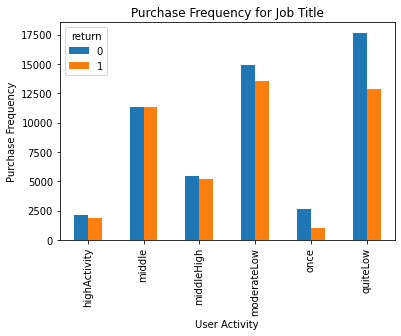

In [ ]:
pd.crosstab(train.userActivity,train["return"]).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('User Activity')
plt.ylabel('Purchase Frequency')

<div style="text-align: justify"> I was also curious to see if the return values of the items will differ in terms of the age range. However, the following graphic shows that both classes have almost the same age ranges. </div>

In [ ]:
fig = px.box(train, x='return', y='user_age')
fig.update_traces(marker_color="#2165A1",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Age and Return')
fig.show()

<h4><b> 3.2 Encoding of Categorical Variables </b></h4>
<br>
<div style="text-align: justify">Since this dataset contains categorical data, we must first encode that data to numbers before continuing to the next phase i.e., building and training the model. The goal is to produce variables that can be used to build predictive features from categories. I have tried some encoding techniques such as one-hot encoding and integer (label) encoding. Of course, appart from the great advantages that each of these approaches offer, they do have some limitations as well. For example, for high cardinality, one-hot encoding can increase the feature space, which is indeed what happened. On the other hand, while label encoding does not have this problem, it is most suitable for ordinal data, which in our dataset is quite not present. This has motivated me to go and explore other options. This search has lead me to the Weight of Evidence Encoding. This encoding orders the categories on a logistic scale, which is why it is possible to determine which category is more predictive. WOE transformation also creates an excelent visual representation. The WOE of a category level is like an estimate of whether this level is more associated with the positive class or the negative class. By looking at the WOE encoded variable, one can see which category favors the return being 0 or 1.</div>

In [ ]:
train['return'] = train['return'].astype(int)

In [ ]:
categorical_vars = ['na_delivery','delivery_year','delivery_month','delivery_day','delivery_dayofweek','order_year',
                    'item_size_num', 'item_sizeOrigin', 'userActivity', 'brandFrequency', 'item_desc','order_month','order_day',
                    'order_dayofweek','item_size','item_color','user_title','user_state']
train[categorical_vars] = train[categorical_vars].astype(str)
test[categorical_vars] = test[categorical_vars].astype(str)

In [ ]:
pip install category_encoders

     |████████████████████████████████| 81kB 4.3MB/s 


In [ ]:
import category_encoders as ce
train_targets = train['return']
train_features = train.drop(['return'], axis=1)
percentage = train_targets.mean() * 100
print("The percentage of ones in the training target is {:.2f}%".format(percentage))

The percentage of ones in the training target is 45.82%


In [ ]:
columns = [col for col in train_features.columns if (col != 'order_item_id' and col != 'delivery_days' and col != 'user_age' and col != 'user_timeRegDays' and col !='moneyTotal' and col !='item_price')]
woe_encoder = ce.WOEEncoder(cols=columns)
woe_encoded_train = woe_encoder.fit_transform(train_features[columns], train_targets).add_suffix('_woe')
train_features = train_features.join(woe_encoded_train)

woe_encoded_cols = woe_encoded_train.columns

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [ ]:
train_featuresData = train_features.drop(["na_delivery", "delivery_year", "delivery_month", "delivery_day", "delivery_dayofweek",
                                          "order_year", "item_size_num", "item_sizeOrigin", "userActivity", "brandFrequency", "item_desc",
                                          "order_month", "order_day", "order_dayofweek", "item_size", "item_color", "user_title", "user_state"],axis=1)

<div style="text-align: justify">Moreover, the weight of evidence analysis provides a measure for evaluation of the predictive power of a feature, called Information Value (IV). With the help of the variables' information value, I have separated the  features that may vs the ones that may not do a sufficient job of classifying our target variable - the return. </div>

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        if show_woe == True:
            print(d)
    return newDF, woeDF

In [ ]:
df = train_featuresData.copy()
df['return'] = train_targets
iv, woe = iv_woe(data = df, target = 'return', bins=10, show_woe = True)
print(iv)
print(woe)

Information value of order_item_id is 0.026361
        Variable               Cutoff  ...       WoE        IV
0  order_item_id     (0.999, 10000.9]  ... -0.127247  0.001608
1  order_item_id   (10000.9, 20000.8]  ... -0.257416  0.006520
2  order_item_id   (20000.8, 30000.7]  ... -0.287213  0.008096
3  order_item_id   (30000.7, 40000.6]  ... -0.070650  0.000497
4  order_item_id   (40000.6, 50000.5]  ...  0.126466  0.001606
5  order_item_id   (50000.5, 60000.4]  ...  0.163272  0.002678
6  order_item_id   (60000.4, 70000.3]  ...  0.137669  0.001903
7  order_item_id   (70000.3, 80000.2]  ...  0.122864  0.001515
8  order_item_id   (80000.2, 90000.1]  ...  0.130067  0.001699
9  order_item_id  (90000.1, 100000.0]  ...  0.048732  0.000238

[10 rows x 9 columns]
Information value of delivery_days is 0.318833
        Variable         Cutoff      N  ...  % of Non-Events       WoE        IV
0  delivery_days  (-0.001, 1.0]  16950  ...         0.157506  0.153748  0.004025
1  delivery_days     (1.0, 2

<div style="text-align: justify">From the analys above, the following can be concluded:
<ul>
<li style="text-align: justify"> user_age, user_timeRegDays, delivery_year_woe, order_year_woe, order_day_woe, item_sizeOrigin_woe, order_month_woe,  order_dayofweek_woe, item_size_woe, item_color_woe, user_title_woe, user_state_woe are <b>useless for prediction</b></li>
<li> order_item_id, item_size_num_woe, moneyTotal, delivery_month_woe, delivery_day_woe, userActivity_woe, brandFrequency_woe, item_desc_woe are <b>weak predictors </b> <i>(it should be noted that 'item_size_num_woe','delivery_day_woe' and 'brandFrequency' were rounded to 0.02 which is why they are in this category)</i> </li> 
<li> item_price, delivery_dayofweek_woe are <b>medium predictors</b></li>
<li> delivery_days is a <b>strong predictor</b></li>
<li> na_delivery_woe is <b>suspicious or too good to be true</b></li>
</ul>
</div>

<div style="text-align: justify"> I have disregarded all features that were labeled as useless for prediction</div>

In [ ]:
dataTrain= df.drop(["user_age","user_timeRegDays","delivery_year_woe","order_year_woe","order_day_woe", "item_sizeOrigin_woe",
                    "order_month_woe","order_dayofweek_woe","item_size_woe","item_color_woe", "user_title_woe","user_state_woe"],axis=1)

In [ ]:
dataTest = test.drop(["user_age","user_timeRegDays","delivery_year","order_year","order_day","item_sizeOrigin",
                      "order_month","order_dayofweek","item_size","item_color","user_title","user_state"],axis=1)

<div style="text-align: justify">The WOE encoding must be done for the test set as well. Under the assumption that the train and test set have the same distribution of the return variable's values, I have mapped the WOE values in the test set for the category variables to be identical to the train's WOE values. In the rare cases when a new level occured in the test data, I could not determine whether this new level is an indication that the corresponding case is a positive or a negative one. That is why these caseses were encoded with WOE = 0, thus meaning that it is equally likely that this item will or will not be returned. </div>

In [ ]:
df = train_features.copy()
df['return'] = train_targets

overall_number_of_ones = train_targets.sum()
overall_number_of_zeroes = 100000 - overall_number_of_ones

grouped = pd.DataFrame()
grouped['Total'] = df.groupby('delivery_month').order_item_id.count()
grouped['number of ones'] = df.groupby('delivery_month')['return'].sum()
grouped['number of zeroes'] = grouped['Total'] - grouped['number of ones']

grouped['percentage of ones'] = (grouped['number of ones'] / overall_number_of_ones)*100
grouped['percentage of zeroes'] = (grouped['number of zeroes'] / overall_number_of_zeroes)*100
grouped['(% ones) > (% zeroes)'] = grouped['percentage of ones'] > grouped['percentage of zeroes']

grouped['weight of evidence'] = df.groupby('delivery_month').delivery_month_woe.mean()

grouped

,Total,number of ones,number of zeroes,percentage of ones,percentage of zeroes,(% ones) > (% zeroes),weight of evidence
delivery_month,,,,,,,
1,3,2,1,0.004365,0.001846,True,0.573130
10,2053,1035,1018,2.258938,1.878853,True,0.184210
11,1027,559,468,1.220045,0.863755,True,0.344999
12,81,32,49,0.069842,0.090436,False,-0.247850
6,7921,4123,3798,8.998647,7.009708,True,0.249751
7,35214,14120,21094,30.817583,38.931749,False,-0.233708
8,39129,19084,20045,41.651753,36.995681,True,0.118538
9,14572,6863,7709,14.978829,14.227972,True,0.051437


In [ ]:
def woeOfTest( data):
  
    na_delivery = {'0': 0.188706,'1': -8.972146}

    delivery_month= {'1':0.573130,'10':0.184210,'11':0.344999,'12':-0.247850,'6':	0.249751,
                    '7':-0.233708,'8':	0.118538,'9':0.051437,'4':0,'5':0,'2':0,'3':0}

    delivery_day={'1'	: -0.006372,'10':	0.052249,'11': -0.229579,'12': -0.161791,'13': 0.118625,
                  '14':	0.088437, '15':	0.036604,'16': -0.044821,'17': 0.105216,'18': -0.143309,
                  '19': -0.231271,'2': -0.015166,'20': 0.029049,'21': 0.034134,'22': 0.072504,
                  '23':	0.134450,'24':	0.131569,'25'	:	0.095518,'26': 0.125722,'27':	0.195018,'28': 0.215445,
                  '29':	0.182189,'3':	0.043677, '30': -0.029214,'31':	0.090704, '4': -0.175053,'5'	: -0.254086,
                  '6':	-0.146493,'7': -0.096733,'8': -0.086736, '9': -0.268198 }

    delivery_dayofweek={'0': 0.002789, '1':	-0.011117,'2': -0.002160,'3': -1.605480,'4': -3.384105,
                        '5': 0.082310,'6': 0.111727}

    item_size_num={'40': 0.154470, '0': -0.106434, '38': -0.013323, '42': 0.200648, '39': 0.064150, '37': 0.045790, '41': 0.154048,
                   '36': 0.101739, '7': 0.148084, '44': 0.141502, '29': -0.143548, '8': 0.170328, '9': -0.000250, '6': 0.336245,
                   '5':	0.059343, '31': 0.218958, '43': 0.091351, '48': 0.417943, '10': 0.247002, '21': 0.180737, '45': -0.478962,
                   '46': 0.402897, '34': -0.289576,'4': 0.034134, '23': 0.377960, '33': -0.142490, '22': 0.650091, '11': 0.205405,
                   '18': 0.146159, '12': 0.193640, '1': -0.023390, '2': -0.189010, '95': 0, '90': -1.624094,'47': -0.464858,
                   '24': -0.089380, '54': 0.321816, '30': 0.242888, '35': -0.450447, '19': 0.269448, '3': -0.493733, '50': 0.328008,
                   '20': 0.069685, '27': -0.565223, '28': -0.914947,'13' :0.588878, '25': -0.048558, '32': -0.111920, '26': -0.326354,
                   '52': -0.407699, '14': 0.390809, '56': -0.679633}
    
    userActivity={'highActivity': 0.072116,'middle': 0.170746,'middleHigh': 0.108167,
                  'moderateLow': 0.067877,'once': -0.800158,'quiteLow': -0.151730}

    brandFrequency= {'high': 0.164538,'low': -0.304760,'lowMedium': -0.199700,'medium':	0.132198,
                      'mediumHigh': -0.007594,'mediumLow': -0.043190,'oneTime': -0.679633,
                      'veryHigh':	-0.183238,'veryLow': -0.766644}
    
    item_desc={'bigNum': -0.922252, 'halfSize': 0.140225, 'letterSize': -0.026264, 'nummericSize': 0.114583, 'unsized': -0.792037}
    

    for i in range(data.order_item_id.size):
        if str(data.na_delivery[i]) in na_delivery:
            data.na_delivery_woe[i] = na_delivery[str(data.na_delivery[i])]
        if data.userActivity[i] in userActivity:
            data.userActivity_woe[i] = userActivity[data.userActivity[i]]
        if data.brandFrequency[i] in brandFrequency:
            data.brandFrequency_woe[i] = brandFrequency[data.brandFrequency[i]]
        if str(data.delivery_month[i]) in delivery_month:
            data.delivery_month_woe[i] = delivery_month[str(data.delivery_month[i])]
        if str(data.delivery_day[i]) in delivery_day:
            data.delivery_day_woe[i] = delivery_day[str(data.delivery_day[i])]
        if str(data.delivery_dayofweek[i]) in delivery_dayofweek:
            data.delivery_dayofweek_woe[i] = delivery_dayofweek[str(data.delivery_dayofweek[i])]
        if data.item_desc[i] in item_desc:
            data.item_desc_woe[i] = item_desc[data.item_desc[i]]
        if str(data.item_size_num[i]) in item_size_num:
            data.item_size_num_woe[i] = item_size_num[str(data.item_size_num[i])]
    return data

In [ ]:
woe_encoded_test = pd.DataFrame(columns=['na_delivery_woe','delivery_month_woe','delivery_day_woe','delivery_dayofweek_woe','item_size_num_woe','userActivity_woe','brandFrequency_woe','item_desc_woe'])
dataTest = dataTest.join(woe_encoded_test)
dataTest = woeOfTest(dataTest)

dataTest= dataTest.drop(['na_delivery','userActivity','brandFrequency','delivery_month','delivery_day','delivery_dayofweek','item_desc','item_size_num'],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning:


A value is tryi

In [ ]:
dataTest['na_delivery_woe']=dataTest.na_delivery_woe.astype(float)
dataTest['delivery_month_woe']=dataTest.delivery_month_woe.astype(float)
dataTest['delivery_day_woe']=dataTest.delivery_day_woe.astype(float)
dataTest['delivery_dayofweek_woe']=dataTest.delivery_dayofweek_woe.astype(float)
dataTest['item_size_num_woe']=dataTest.item_size_num_woe.astype(float)
dataTest['userActivity_woe']=dataTest.userActivity_woe.astype(float)
dataTest['brandFrequency_woe']=dataTest.brandFrequency_woe.astype(float)
dataTest['item_desc_woe']=dataTest.item_desc_woe.astype(float)

In [ ]:
dataTest.info()
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_item_id           50000 non-null  int64  
 1   delivery_days           50000 non-null  int64  
 2   moneyTotal              50000 non-null  int64  
 3   item_price              50000 non-null  float64
 4   na_delivery_woe         50000 non-null  float64
 5   delivery_month_woe      50000 non-null  float64
 6   delivery_day_woe        50000 non-null  float64
 7   delivery_dayofweek_woe  50000 non-null  float64
 8   item_size_num_woe       50000 non-null  float64
 9   userActivity_woe        50000 non-null  float64
 10  brandFrequency_woe      50000 non-null  float64
 11  item_desc_woe           50000 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 4.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13

<div style="text-align: justify">Lastly, before moving on to the Model tuning and selection, I wanted to check the pairwise correlation between features. A nice way to do this is by visualizing the correlation matrix as a heatmap. I have also included the target variable which will indicate whether there is a strong correlation between certain features and the target. It should be noted that correlation heatmaps apply only to the numerical features, hence why I am doing it now, after the encoding process.
<br>
Since we have a fair large amount of variables, I have filtered and plotted those variables whose pairwise correlation is above the threshlod of 0.3.
<br>
From the heatmap we can conclude that there seems to be a mild correlation between the 'na_delivery_woe' and the 'return' variables. This was rather expected as the 'na_delivery_woe' was listed as a too good to be true predictor. Other than that, also reasonable seems to be the correlation between the features 'user_Activity_woe' and 'moneyTotal'.
</div>

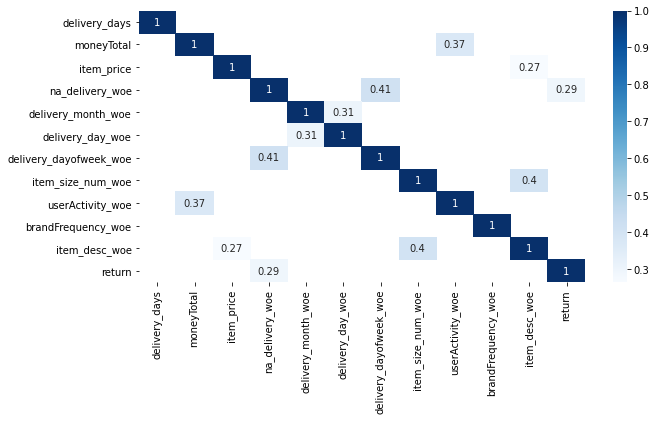

In [ ]:
df = dataTrain.drop(['order_item_id'],axis=1)
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c[(c >= 0.25) | (c<= -0.25)],cmap="Blues",annot=True)

<h3><b> 4. Model tuning and selection </b></h3>
<br>
<div style="text-align: justify"> In this section I will anaylse certain approaches to model selection. Our task, as already mentioned is to predict item's returns. Since there are two outcomes, a return and a non return, we have to solve a binary classification problem. I have used several machine learning algorithms, so it will be interesting to see which model will contribute to the a better classification of the products' returns. It is important to note that before building the models, I have used Forward Selection. It's goal is to select the best performing features on a constructed model (linear regression). The results of the Forward Selection has classified 'delivery_month_woe' as a feature without predictive power.
<br><br>
Another topic I would like to address is the class imbalance in this dataset. As I briefly mentioned earlier, the percentage of ones in the training target is 45.82%. This is close enough to having balanced data which is why measures do not need to be taken to correct for the imbalance. 
<br><br>
Of course, in order to prevent overfitting on the train data and to build unbiased models, I have excluded a part from the known data into a train and a test set. Since we had enough known data, I have set the ratio to be 70:30, meaning that 70000 entries are used to build the model and the rest 30000 entries to validate the model's performance.
</div>



In [ ]:
dt_tr= dataTrain.drop(["order_item_id"],axis=1) # since it is not a feature
y = dt_tr ["return"]
X = dt_tr.drop("return", 1)

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



['delivery_dayofweek_woe',
 'na_delivery_woe',
 'item_price',
 'userActivity_woe',
 'item_desc_woe',
 'moneyTotal',
 'brandFrequency_woe',
 'item_size_num_woe',
 'delivery_days',
 'delivery_day_woe']

In [ ]:
dt_tr= dt_tr.drop(["delivery_month_woe"],axis=1) #"delivery_dayofweek_woe"],axis=1)
y = dt_tr ["return"]
X = dt_tr.drop("return", 1)

In [ ]:
def display_summary(true,pred):
    tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
    precision = 1.*(tp)/(tp+fp)
    sens = 1.*tp/(tp+fn)
    print('confusion matrix')
    print(np.array([[tn,fn],[fp,tp]]))
    print('sensitivity is',sens) #when the actual value is positive, how often is the prediction correct? or #metrics.recall_score(y_test, y_pred_class)
    print('specificity is',1.*tn/(tn+fp)) #when the actual value is negative, how often is the prediction correct?
    print('accuracy is',1.*(tp+tn)/(tp+tn+fp+fn))
    print('classification error is ',(1 - metrics.accuracy_score(true, pred))) #overall, how often is the classifier incorrect? or (fp+fn)/(tp+tn+fp+fn))
    print('precision is',precision)
    print('f1 score is',1*(2*(sens*precision)/(sens+precision)))
    print('auc score is', metrics.roc_auc_score(true, pred))

def split():
  return train_test_split(X, y, test_size=0.3, random_state=30) ## the train set was split into train and test set. 66% of te data were used to tain te models, 33% to fit them.

X_train, X_test, y_train, y_test = split()

In [ ]:
max(y_test.mean(), 1 - y_test.mean())

0.5422666666666667

<div style="text-align: justify"> The null accuracy is 0.54. This indicates that a dumb model which always predicts 0 would be right 54% of the time. It is a good way to know the minimum that should be achived with any other model. </div>

In [ ]:
def plot_roc_curve(fprs, tprs):
  
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='darkorange', alpha=.8)
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='navy', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index, model):
    y_predict = model.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

<h4><b> 4.1 Cost insensitive learning </b></h4>
<br>
<h5><b> 4.1.1 Random Forest </b></h5>
<br>
<div style="text-align: justify"> First on my list was the Random Forest algorithm, which is an ensemble learning method, composed of multiple decision trees. By averaging out the impact of several decision trees, random forests tend to improve prediction. To begin with, I wanted to see how will the model with default parameters perform. The area under the curve score is 0.65% when using split sampling. On the other side, when using cross validation, the AUC score on the test set as increased to 72%. Let's see how will the model behave once I tune in certain parameters. </div>

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
display_summary(y_test,y_pred_rf)

confusion matrix
[[10858  4971]
 [ 5410  8761]]
sensitivity is 0.6379988348383339
specificity is 0.6674452913695599
accuracy is 0.6539666666666667
classification error is  0.3460333333333333
precision is 0.6182344224119681
f1 score is 0.6279611511307028
auc score is 0.652722063103947


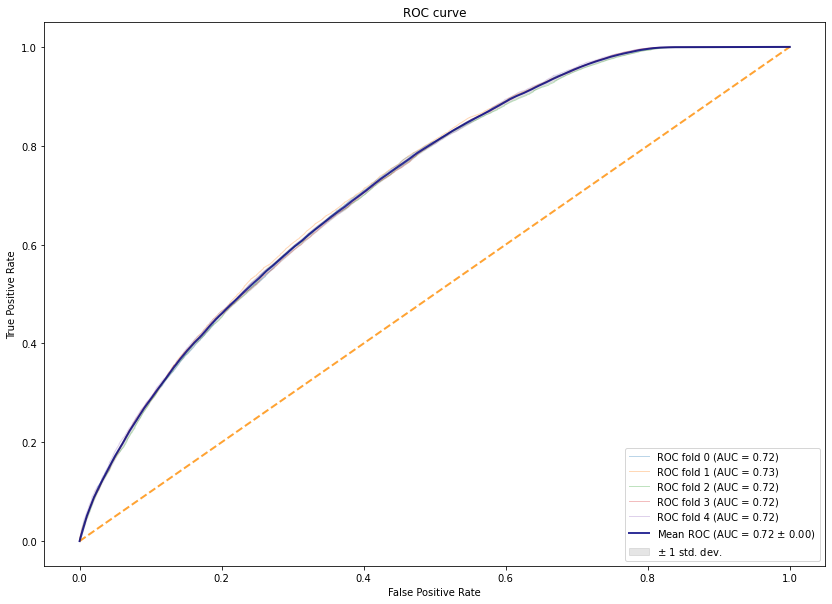

,AUC Train,AUC Test
0,0.997738,0.723230
1,0.997745,0.726508
2,0.997876,0.719856
3,0.997723,0.722110
4,0.997671,0.724726


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (tra, tst), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[tra], y.iloc[tra])
    _, _, auc_score_train = compute_roc_auc(tra, rf)
    fpr, tpr, auc_score = compute_roc_auc(tst, rf)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

<div style="text-align: justify">Right before tuning in the parameters, I examined the feature importance, with which we can compare how valuable each feature has been for the model. It is often the case that the more features are included in the model, the likelihood of overfitting increases. This plot shows us that 'item_desc_woe' and 'userActivity_woe' are the two least valuable features and has done little in contributing to the outcome of my predictions. Moreover, if we recall the results of the WOE analysis, these two features were classified as weak predictores. <br> However, while I am not an expert in this domain, I would for know leave out only 'item_desc_woe', since I believe the activity of the user might still be of interest.
</div>

In [ ]:
def plot_feature_importances(model, X_train):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

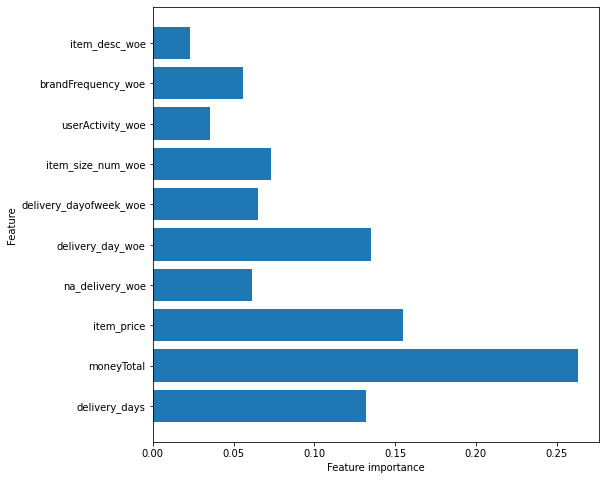

In [ ]:
plot_feature_importances(rf, X_train)

In [ ]:
dt_tr= dt_tr.drop(["item_desc_woe"],axis=1)
y = dt_tr ["return"]
X = dt_tr.drop("return", 1)
X_train, X_test, y_train, y_test = split()

<div style="text-align: justify"> Next thing on the to-do list is paramater 
tuning, with the help of a grid search. Some of the values from this search's results - the 'n_estimators' parameter value, caught my eye. Namely, 200 trees seemed a bit too much. That is why I have decided to take a look only at this parameter's behaviour on the model, according to which, after adding around 50 trees there is hardly a change in the AUC score. However, if the dataset is large and the number of trees is too small, then some observations will be predicted only once or not at all. Moreover, if the number of predictors is large, but the number of trees again is too small, then some features might be missed. In the end, after manually trying out how different values impact the score, I have decided to use 100 trees.</div>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 2)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 20, num = 2)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 7, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.5s
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

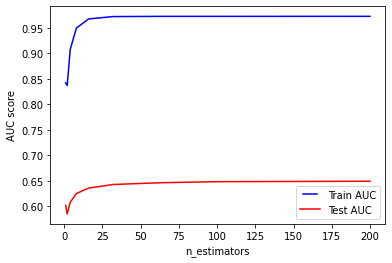

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
rf = RandomForestClassifier(bootstrap = True,max_depth = 20,max_features = 'sqrt', min_samples_leaf =  2,min_samples_split = 10,n_estimators = 100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest')
display_summary(y_test,y_pred_rf)

Random Forest
confusion matrix
[[10531  4584]
 [ 5737  9148]]
sensitivity is 0.6661811826390912
specificity is 0.6473444799606589
accuracy is 0.6559666666666667
classification error is  0.3440333333333333
precision is 0.6145784346657709
f1 score is 0.6393402522975853
auc score is 0.6567628312998751


<div style="text-align: justify"> Lastly, after the parameter tuning, I wanted to plot the ROC curve and see if any changes occured. As we can observe in the graphic below, the mean AUC score on the test set with cross validation is now 0.73, which is a small improvement. The area under the curve seems to be not that close to the blue dotted line, which in fact represents the blind guess between classifying a return and no return.</div>

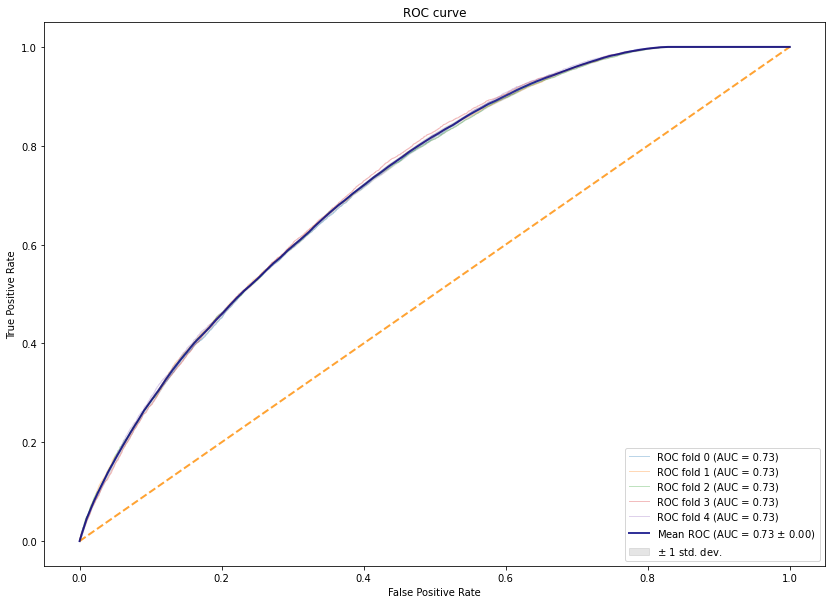

,AUC Train,AUC Test
0,0.939680,0.725849
1,0.937655,0.727653
2,0.940493,0.726120
3,0.941261,0.728777
4,0.940480,0.729173


In [ ]:
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (tra, tst), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[tra], y.iloc[tra])
    _, _, auc_score_train = compute_roc_auc(tra, rf)
    fpr, tpr, auc_score = compute_roc_auc(tst, rf)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

<h5><b> 4.1.2  Logistic Regression </b></h5>
<br>
<div style="text-align: justify">  I have also performed a Logistic regression and tried different solvers which in generall give the same results.  </div>
<br>

In [ ]:
logreg = LogisticRegression(solver='newton-cg',  C=0.05, multi_class='ovr', random_state=0)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print('Logistic Regression')
display_summary(y_test,y_pred_logreg)

Logistic Regression
confusion matrix
[[10802  5791]
 [ 5466  7941]]
sensitivity is 0.5782842994465482
specificity is 0.6640029505778214
accuracy is 0.6247666666666667
classification error is  0.3752333333333333
precision is 0.5923025285298724
f1 score is 0.5852094771362246
auc score is 0.6211436250121849


<div style="text-align: justify"> However, this accuracy can be easily changed with the change of the cutoff. If the predicted probability of return for a customer becomes more than cut off point, we can report that the customer will return a product, and if this probability becomes less than the cut-off point, we can report that the customer will not return an item. The pre-defined cut off value is 0.5. But is this cut off point the best one? And what is exactly at stake? The answers will be discussed in the evaluation section. <div>

In [ ]:
y_pred_logreg_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

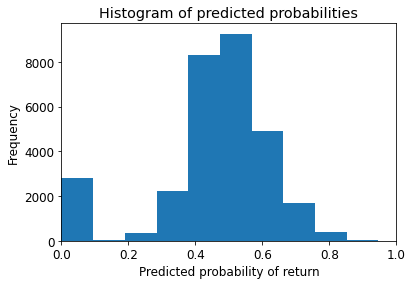

In [ ]:
plt.rcParams['font.size'] = 12
plt.hist(y_pred_logreg_prob, bins=10)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of return')
plt.ylabel('Frequency')

<div style="text-align: justify"> I was also interested in seeing the AUC score and ROC curve, for which I have again used 5 fold Cross Validation. Sadly, as the score of 0.69% already indicates, the area under the curve is now smaller when compared to the Random Forest model above. However, it should be noted that the AUC score on the test set obtained when perfoming cross validation is much better than when spliting the train data to a ratio of 70:30.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed



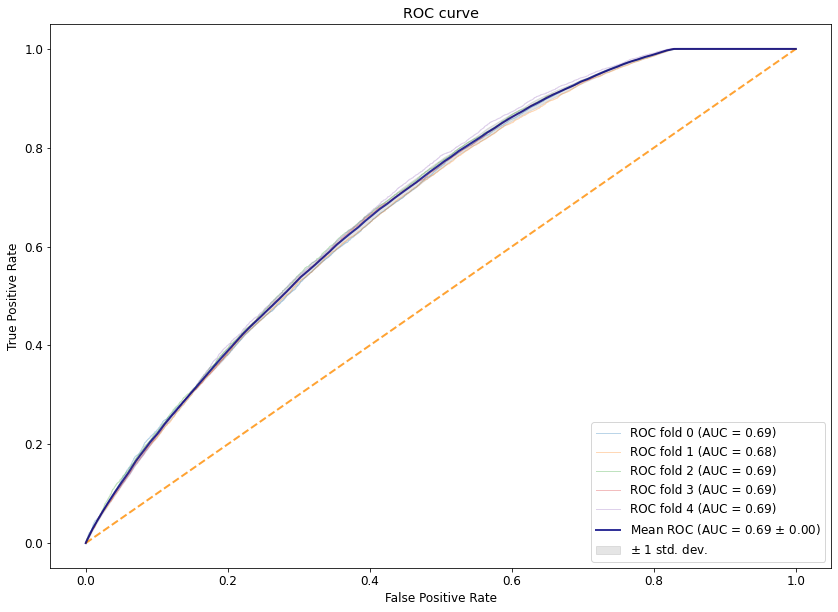

,AUC Train,AUC Test
0,0.689010,0.685117
1,0.689460,0.682239
2,0.687143,0.691284
3,0.688407,0.687145
4,0.686741,0.693481


In [ ]:
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (tr, tst), i in zip(cv.split(X, y), range(5)):
    logreg.fit(X.iloc[tr], y.iloc[tr])
    _, _, auc_score_train = compute_roc_auc(tr, logreg)
    fpr, tpr, auc_score = compute_roc_auc(tst, logreg)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

<h5><b> 4.1.3 Gaussian Naive Bayes </b></h5>
<br>
<div style="text-align: justify">  Another member of the supervised learning algorithms' family is Naive Bayes. This algorithm relies on class conditional independence as it assumes that the effect of a feature on the class is independent of other features [3]. <br><br> However, in comparison to the Logistic Regression above, with a mean AUC score of 67%, this model seems to be worse when predicting the returns in the test set from the cross validation. The AUC score without using cross validation is even lower.</div>
<br>

In [ ]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
y_pred_gnb = clf_gnb.predict(X_test)
display_summary(y_test,y_pred_gnb)

confusion matrix
[[ 2918    73]
 [13350 13659]]
sensitivity is 0.9946839498980483
specificity is 0.17937054339808212
accuracy is 0.5525666666666667
classification error is  0.44743333333333335
precision is 0.5057203154504054
f1 score is 0.6705284602734346
auc score is 0.5870272466480653


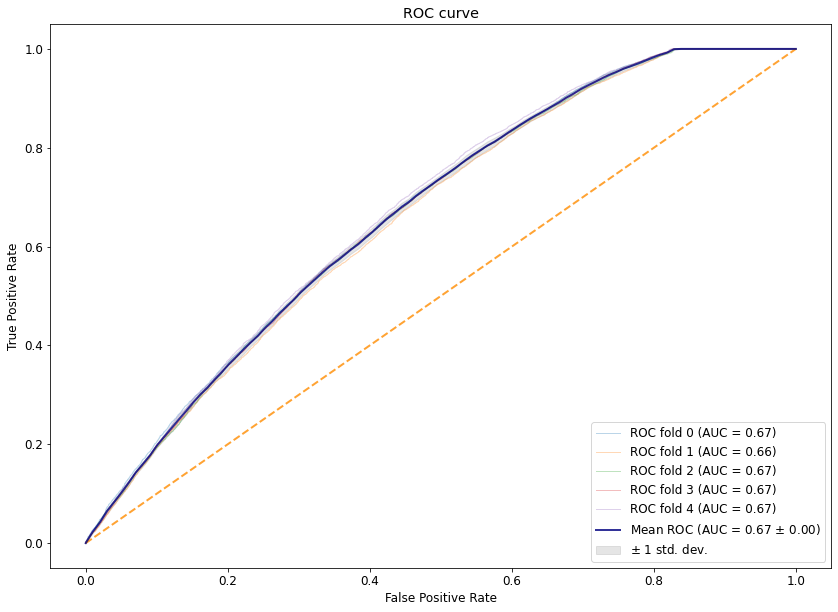

,AUC Train,AUC Test
0,0.669177,0.670880
1,0.669352,0.660523
2,0.667561,0.666545
3,0.668597,0.667728
4,0.667324,0.674693


In [ ]:
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (tr, tst), i in zip(cv.split(X, y), range(5)):
    clf_gnb.fit(X.iloc[tr], y.iloc[tr])
    _, _, auc_score_train = compute_roc_auc(tr, clf_gnb)
    fpr, tpr, auc_score = compute_roc_auc(tst, clf_gnb)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

<h5><b> 4.1.4 Decision Tree </b></h5>
<br>
<div style="text-align: justify"> Decision trees, or in our case classification trees, are in fact a series of questions designed to assign a classification. However, the classification tress can easily become a subject to overfitting which is why I decided for a low value of the max_depth parameter.<br><br> As for the mean AUC score on the test set with cross validation, this model obtains the same score as the Logistic Regression.

In [ ]:
clf_dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_dt = clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
display_summary(y_test,y_pred_dt)

confusion matrix
[[10299  5074]
 [ 5969  8658]]
sensitivity is 0.6304981066122924
specificity is 0.633083353823457
accuracy is 0.6319
classification error is  0.3681
precision is 0.591919053804608
f1 score is 0.6105998095842591
auc score is 0.6317907302178747


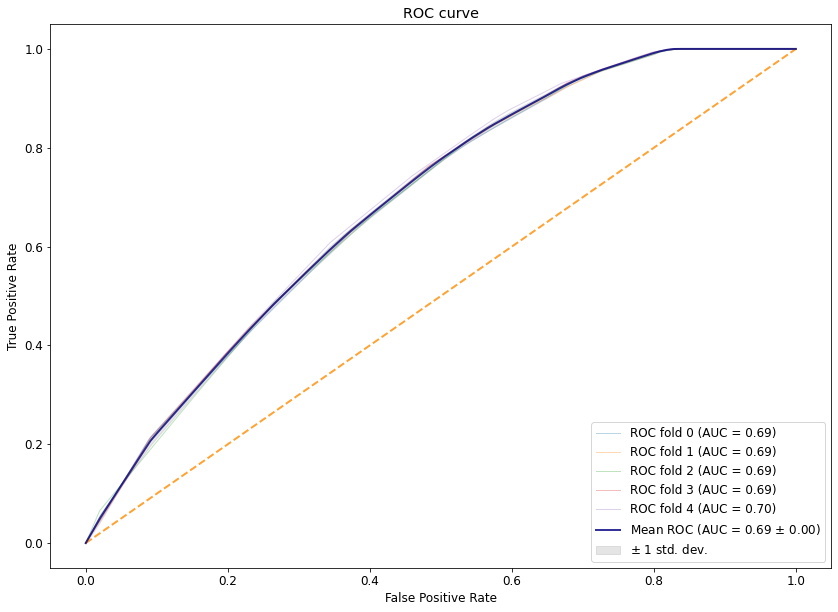

,AUC Train,AUC Test
0,0.694047,0.687338
1,0.693369,0.690039
2,0.690958,0.686810
3,0.693697,0.689949
4,0.691855,0.695017


In [ ]:
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (tr, tst), i in zip(cv.split(X, y), range(5)):
    clf_dt.fit(X.iloc[tr], y.iloc[tr])
    _, _, auc_score_train = compute_roc_auc(tr, clf_dt)
    fpr, tpr, auc_score = compute_roc_auc(tst, clf_dt)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

<h5><b> 4.1.5 XGBoost </b></h5>
<br>
<div style="text-align: justify"> Another classification model that I have tried out is the XGBoost. XGBoost is an ensemble of decision trees where the new trees the fix errors made by the previous trees. To begin with, I have built a model with a learning rate of 8 and the number of features allowed to make the best split while building the tree was set to be the square root of the total number of features. In addition, I also searched the hyper-parameter space for the best cross validation score. This grid search has resulted in using 200 trees to a maximum depth of 20, a minimum sum of instance weight set to 10, a 0.6 subsample ratio of the training instances and a 0.8 subsample ratio of columns when constructing each of the trees. Furthermore, the L1 regularization parameter was set to 1.1 and the L2 to 1.3. Lastly, the minimum loss reduction required to make a further partition on a leaf node of the tree was set to 0.5. It should be noted that the larger the values of these last three parameters, the more conservative the alorithm will be.
<br>
<br>
Similary as before, I plotted the ROC curve. With this model, the tendency of having low mean AUC scores on test data is finally broken. With an AUC of 72%, this algorithm becomes the second best performing algorithm. (for now, only in terms of AUC score with cross validation.) </div>


In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(random_state=1,learning_rate=0.03, max_features = 'sqrt')
xgb_clf = xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print('XGBoost')
display_summary(y_test,y_pred_xgb)

XGBoost
confusion matrix
[[9680 4389]
 [6588 9343]]
sensitivity is 0.6803815904456744
specificity is 0.5950331940004918
accuracy is 0.6341
classification error is  0.3659
precision is 0.586466637373674
f1 score is 0.6299430266662173
auc score is 0.6377073922230831


In [ ]:
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'max_depth': [3, 4, 5, 15, 20],
    'n_estimators': [100, 200, 300, 500],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
  }

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 101)

random_search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=101)

random_search.fit(X, y)
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  5.3min finished


{'subsample': 0.6, 'reg_lambda': 1.3, 'reg_alpha': 1.1, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 20, 'gamma': 0.5, 'colsample_bytree': 0.8}


In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=1,learning_rate=0.03, max_features = 'sqrt', subsample=0.6, reg_lambda= 1.3, reg_alpha= 1.1,
                            n_estimators=200, min_child_weight=10, max_depth=20, gamma= 0.5, colsample_bytree = 0.8)
xgb_clf = xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print('XGBoost')
display_summary(y_test,y_pred_xgb)

XGBoost
confusion matrix
[[10673  4826]
 [ 5595  8906]]
sensitivity is 0.6485581124381008
specificity is 0.656073272682567
accuracy is 0.6526333333333333
classification error is  0.3473666666666667
precision is 0.6141645403765258
f1 score is 0.6308929267169625
auc score is 0.6523156925603338


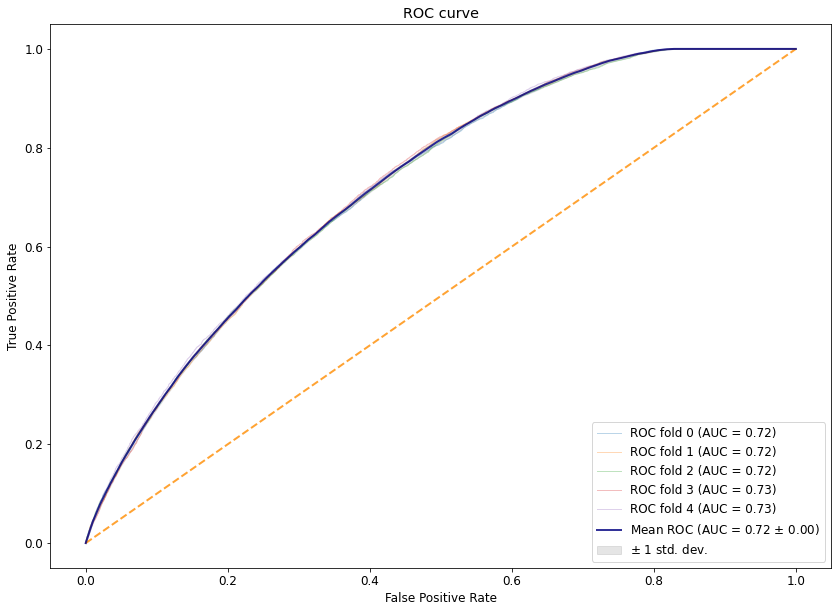

,AUC Train,AUC Test
0,0.855459,0.722946
1,0.855265,0.723810
2,0.855110,0.722542
3,0.856339,0.725350
4,0.856056,0.727281


In [ ]:
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (tr, tst), i in zip(cv.split(X, y), range(5)):
    xgb_clf.fit(X.iloc[tr], y.iloc[tr])
    _, _, auc_score_train = compute_roc_auc(tr, xgb_clf)
    fpr, tpr, auc_score = compute_roc_auc(tst, xgb_clf)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

<h5><b> 4.1.6 SVM </b></h5>
<br>
<div style="text-align: justify"> Last, but certainly not the least, is the popular and widely used supervised machine learning algorithm - Support Vector Machine. This algorithm classifyies the data by finding the best hyperplane that separates all data from one class from the data of the other class [4]. In my case I have used a rbf kernel, a gamma parameter of 0.2 and a C value of 1.0. The radial basis function kernel can map the input space in infinite dimensional space and is very popular because of the similarity to the Gaussian distirbution. A very high value of gamma is likely to over-fit, hence the relativly low value of 0.1. The value of the C parameter represents the misclassification in terms of error. When C is small, the classifier is okay with misclassified data points. On the other side, when this value is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards to avoid any misclassified data points. Hance, large values ensure to correctly classify even the most extreme possible observations. As I would like this model to perform well with new data, I have decided for a smaller value of C.
<br><br>
The AUC score on the test set without using cross validation is  0.6, which, when compared to the other models is pretty low. However, let's see the models' behaviour when the costs come in sight. </div>


In [ ]:
clf_svm = svm.SVC(kernel='rbf', gamma= 0.1, C=1)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
print('SVM')
display_summary(y_test,y_pred_svm)

SVM
confusion matrix
[[11628  7054]
 [ 4640  6678]]
sensitivity is 0.4863093504223711
specificity is 0.7147774772559626
accuracy is 0.6102
classification error is  0.38980000000000004
precision is 0.5900335748365435
f1 score is 0.5331736526946107
auc score is 0.6005434138391668


<h4><b> 4.2 Cost Sensitive learning </b></h4>
<br>
<div style="text-align: justify"> As we already know, the return is classified as a "positive" class or 1 if an item within the order is returned and as a "negative" or 0 if the customer keeps all purchased items. Then this prediction is compared to the actual customer returns, which is how we obtain the true positive, false positive, false negative and true negative values. All this values are contained in the Confusion Matrix, which compares the predicted and the actual class of the outcome.
Before diving deeper into how the models performed and the actual error costs, let's quickly take a look at what acctually these four clases represent:
</div>
<br>

- **True positive**: Predicting that the customer will return an item and the shop displays a warning message to discourage the purchase (this is correctly predicted as a return)
- **True Negative**: Predicting that the customer will not return an item and the shop does not display a warning message to discourage the purchase (this is correctly predicted as a non return
- **False Positive**: Predicting that the customer will return an item when he does not plan to, but a warning message is shown so the item is not even purchased
- **False Negative**: Predicting that the customer will not return a product when he actually does, so a warning message is not displayed.

<br>
<div style="text-align: justify"> Every modeling method has errors and there are two types of errors: Error type 1 which means reporting a return when one does not occure (FP) and Error type 2 which means not reporting a return when one occurs (FN). Error type 1 may cause losing a good customer but error type 2 includes costs for handling the return, which are in casses bigger than product value itself. Finding a model which can minimize both error type 1 and 2, is the goal. It should also be noted that there is no cost penalty associated with True Positive and True Negatives as they are correctly identified. </div>
<br>

- True Positive: **0 cost**
- True Negative: **0 cost**
- False Positive: **(0.5*value of item) cost**
- False Negative: **0.5 ⋅ 5 ⋅ (3 + 0.1 ⋅ value_of_item) cost**

<br>
<div style="text-align: justify"> 
Hence the total cost will be equal to the cost of not predictinng a return multiplied by the number of False Negative cases plus the cost of wrongly predicting a return multiplied by the number of these False Positive cases. owever it should be noted that this total cost will be calcualted for the test set obtained from the train data with the split sample approach (333333 entries)</div>
    <br>
    
   **Total Cost = C(FN)xFN + C(FP)xFP**, where in our case: C(FN) > C(FP).
    
   <br>
    
<div style="text-align: justify">   
The role of cost matrix comes in hand when we want to find the optimal cut off value for a classification rule. The cut off value will optimize between the cost of an opportunity loss (the customer who wouldn't not return an item) and cost of accepting a default customer (a customer who will return an item). Selecting the best cut off point is done by minimizing the above mentioned errors. Since False Negatives are more costly, it will be our primary goal to reduce them.
<br>While building the models I have tried out different hyperparameters,  
However, most classification algorithms try to minimize the percentage of incorrect prediction of class labels. They ignore the difference between the missclassified error types, hence their assumption that all these errors cost the same. 
On the other hand, cost-sensitive learning takes costs into consideration, which plays a very important role in real-world data mining problems, such as ours [5].

<br>
I have addressed this problem in two ways, using threshold tuning and the CostCla module that provides set of cost-sensitive algorithms.


In [ ]:
!pip install costcla

     |████████████████████████████████| 4.0MB 10.1MB/s 
  Created wheel for pyea: filename=pyea-0.2-cp37-none-any.whl size=6017 sha256=31feb40afa5efc5d813f62bde9f14f3e562f59f0f31f8c9bec7e3e280a1458cd
  Stored in directory: /root/.cache/pip/wheels/3c/bf/6e/06f8b0ed23cbc1fe956f8b6756535cb36f0b68c2f0f2342178
Successfully built pyea


<div style="text-align: justify">   As previously discussed, the cost of both true negatives and true positives is set to be 0 and the cost of FN and FP to be their cost function, accordingly. </div>

In [ ]:
from costcla.metrics import cost_loss, savings_score
from costcla.models import CostSensitiveLogisticRegression, CostSensitiveDecisionTreeClassifier,CostSensitiveRandomForestClassifier

# cost_mat[C_FP,C_FN,C_TP,C_TN]
cost_mat_train = np.zeros((len(y_train),4))
#false positives cost 0.5 ⋅ 𝑣
cost_mat_train[:,0]=0.5*X_train['item_price']
#false negatives cost 0.5 ⋅ 5 ⋅ (3 + 0.1 ⋅ 𝑣)
cost_mat_train[:,1]=0.5 * 5 * (3+ 0.1*X_train['item_price'])  
 
cost_mat_test = np.zeros((len(y_test),4))
cost_mat_test[:,0]=0.5*X_test['item_price']
cost_mat_test[:,1]=0.5 * 5 * (3+ 0.1*X_test['item_price']) 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



<div style="text-align: justify"> Now I will tune the cutoff in each of the models to see which threshold has produced the lowest cost.
<br>
<br>
<h5><b> 4.2.1 Logistic Regression Cost Sensitive Threshold  </b></h5>

In [ ]:
bestCost_lg = cost_loss(y_test,y_pred_logreg,cost_mat_test)
bestCutoff_lg = 0.5

for cutoff in np.arange (0.1, 0.9, 0.1):
  y_pred_logreg_cutoff = binarize(y_pred_logreg_prob.reshape(-1,1), cutoff)
  if cost_loss(y_test,y_pred_logreg_cutoff,cost_mat_test) < bestCost_lg:
    bestCost_lg = cost_loss(y_test,y_pred_logreg_cutoff,cost_mat_test)
    bestCutoff_lg = cutoff

print('best cost value: ', bestCost_lg, ', cutoff value: ', bestCutoff_lg)
y_pred_logreg_cutoff = binarize(y_pred_logreg_prob.reshape(-1,1), bestCutoff_lg)
display_summary(y_test,y_pred_logreg_cutoff)

best cost value:  331831.5 , cutoff value:  0.6
confusion matrix
[[14597 10626]
 [ 1671  3106]]
sensitivity is 0.22618700844742207
specificity is 0.8972830095893779
accuracy is 0.5901
classification error is  0.40990000000000004
precision is 0.6501988695834205
f1 score is 0.3356205089415959
auc score is 0.5617350090184


<h5><b> 4.2.2 Gaussian Naive Bayes Cost Sensitive Threshold <b></h5>

In [ ]:
bestCost_gnb = cost_loss(y_test,y_pred_gnb,cost_mat_test)
y_pred_gnb_prob = clf_gnb.predict_proba(X_test)[:, 1]
bestCutoff_gnb = 0.5

for cutoff in np.arange (0.1, 0.9, 0.1):
  y_pred_gnb_cutoff = binarize(y_pred_gnb_prob.reshape(-1,1), cutoff)
  if cost_loss(y_test,y_pred_gnb_cutoff,cost_mat_test) < bestCost_gnb:
    bestCost_gnb = cost_loss(y_test,y_pred_gnb_cutoff,cost_mat_test)
    bestCutoff_gnb = cutoff

print('best cost value: ', bestCost_gnb, ', cutoff value: ', bestCutoff_gnb)
y_pred_gnb_cutoff = binarize(y_pred_gnb_prob.reshape(-1,1), bestCutoff_gnb)
display_summary(y_test,y_pred_gnb_cutoff) #this model has high sensitivity and low specificity, hence why the cost has a bigger value.

best cost value:  391891.69499999995 , cutoff value:  0.8
confusion matrix
[[ 3030   109]
 [13238 13623]]
sensitivity is 0.9920623361491407
specificity is 0.1862552249815589
accuracy is 0.5551
classification error is  0.44489999999999996
precision is 0.5071665239566658
f1 score is 0.6711994678885522
auc score is 0.5891587805653499


<h5><b> 4.2.3 Decision Tree Cost Sensitive Threshold  <b></h5>

In [ ]:
bestCost_dt = cost_loss(y_test,y_pred_dt,cost_mat_test)
y_pred_dt_prob = clf_dt.predict_proba(X_test)[:, 1]
bestCutoff_dt = 0.5

for cutoff in np.arange (0.1, 0.9, 0.1):
  y_pred_dt_cutoff = binarize(y_pred_dt_prob.reshape(-1,1), cutoff)
  if cost_loss(y_test,y_pred_dt_cutoff,cost_mat_test) < bestCost_dt:
    bestCost_dt = cost_loss(y_test,y_pred_dt_cutoff,cost_mat_test)
    bestCutoff_dt = cutoff

print('best cost value: ', bestCost_dt, ', cutoff value: ', bestCutoff_dt)
y_pred_dt_cutoff = binarize(y_pred_dt_prob.reshape(-1,1), bestCutoff_dt)
display_summary(y_test,y_pred_dt_cutoff)

best cost value:  320630.18250000005 , cutoff value:  0.6
confusion matrix
[[14777 10783]
 [ 1491  2949]]
sensitivity is 0.21475385959801924
specificity is 0.9083476764199656
accuracy is 0.5908666666666667
classification error is  0.40913333333333335
precision is 0.6641891891891892
f1 score is 0.32456526524323137
auc score is 0.5615507680089924


<h5><b> 4.2.4 Random Forest Cost Sensitive Threshold  </b></h5>

In [ ]:
bestCost_rf = cost_loss(y_test,y_pred_rf,cost_mat_test)
y_pred_rf_prob = rf.predict_proba(X_test)[:, 1]
bestCutoff_rf = 0.5

for cutoff in np.arange (0.1, 0.9, 0.1):
  y_pred_rf_cutoff = binarize(y_pred_rf_prob.reshape(-1,1), cutoff)
  if cost_loss(y_test,y_pred_rf_cutoff,cost_mat_test) < bestCost_rf:
    bestCost_rf = cost_loss(y_test,y_pred_rf_cutoff,cost_mat_test)
    bestCutoff_rf = cutoff

print('best cost value: ', bestCost_rf, ', cutoff value: ', bestCutoff_rf)
y_pred_rf_cutoff = binarize(y_pred_rf_prob.reshape(-1,1), bestCutoff_rf)
display_summary(y_test,y_pred_rf_cutoff)

best cost value:  162240.44000000003 , cutoff value:  0.6
confusion matrix
[[15403  5839]
 [  865  7893]]
sensitivity is 0.5747888144480047
specificity is 0.9468281288418982
accuracy is 0.7765333333333333
classification error is  0.2234666666666667
precision is 0.9012331582553095
f1 score is 0.7019119608714984
auc score is 0.7608084716449515


<h5><b> 4.2.5 XGBoost Cost Sensitive Threshold  </b></h5>

In [ ]:
bestCost_xgb = cost_loss(y_test,y_pred_xgb,cost_mat_test)
y_pred_xgb_prob = xgb_clf.predict_proba(X_test)[:, 1]
bestCutoff_xgb = 0.5

for cutoff in np.arange (0.1, 0.9, 0.1):
  y_pred_xgb_cutoff = binarize(y_pred_xgb_prob.reshape(-1,1), cutoff)
  if cost_loss(y_test,y_pred_xgb_cutoff,cost_mat_test) < bestCost_xgb:
    bestCost_xgb = cost_loss(y_test,y_pred_xgb_cutoff,cost_mat_test)
    bestCutoff_xgb = cutoff

print('best cost value: ', bestCost_xgb, ', cutoff value: ', bestCutoff_xgb)
y_pred_xgb_cutoff = binarize(y_pred_xgb_prob.reshape(-1,1), bestCutoff_xgb)
display_summary(y_test,y_pred_xgb_cutoff)

best cost value:  219251.52 , cutoff value:  0.6
confusion matrix
[[14744  6932]
 [ 1524  6800]]
sensitivity is 0.49519370812700264
specificity is 0.9063191541676912
accuracy is 0.7181333333333333
classification error is  0.2818666666666667
precision is 0.8169149447381067
f1 score is 0.6166122597025753
auc score is 0.7007564311473469


<h5><b> 4.2.6 SVM Cost </b></h5>


In [ ]:
# This model's cost was not calculated by examining the threshold that produces the lowest cost,
# as for that one must set the Probability value to true, which I tried, but due to low computational power the fitting of the model seemed to never finish.
print('best cost value: ',cost_loss(y_test,y_pred_svm,cost_mat_test))
display_summary(y_test,y_pred_svm)

best cost value:  332696.4925
confusion matrix
[[11628  7054]
 [ 4640  6678]]
sensitivity is 0.4863093504223711
specificity is 0.7147774772559626
accuracy is 0.6102
classification error is  0.38980000000000004
precision is 0.5900335748365435
f1 score is 0.5331736526946107
auc score is 0.6005434138391668


<h5><b> 4.2.7 Cost Sensitive Algorithms  </b></h5>
<div style="text-align: justify"> The python package CostCla can fit cost-sensitive logistic regression, decission trees and random forest classifiers. After fitting the models, I will compare and discuss the performance on the cost-sensitive loss between these three classsifiers and the above models.

In [ ]:
f = CostSensitiveLogisticRegression(C=0.05)
f.fit(np.array(X_train),np.array(y_train), cost_mat_train)
y_pred_logistic_cslr = f.predict(X_test)
 
g = CostSensitiveRandomForestClassifier(n_estimators=30)
g.fit(np.array(X_train), np.array(y_train), cost_mat_train)
y_pred_rf_cslr=g.predict(np.array(X_test))
 
h = CostSensitiveDecisionTreeClassifier(criterion="entropy", max_depth=5)
h.fit(np.array(X_train), np.array(y_train), cost_mat_train)
y_pred_tree_cslr = h.predict(np.array(X_test))

/usr/local/lib/python3.7/dist-packages/costcla/models/regression.py:45: RuntimeWarning:

overflow encountered in exp



In [ ]:
print('Total Cost Logistic Regression: ', bestCost_lg)
print('Total Cost Gaussian Naive Bayes: ', bestCost_gnb)
print('Total Cost Decision Tree: ', bestCost_dt)
print('Total Cost Random Forest: ', bestCost_rf)
print('Total Cost XGBoost: ',bestCost_xgb)
print('Total Cost SVM: ',cost_loss(y_test,y_pred_svm,cost_mat_test))
print('Total Cost Logistic Regression - cost sensitve learning: ',cost_loss(y_test,y_pred_logistic_cslr,cost_mat_test))
print('Total Cost Decision Tree - cost sensitve learning: ', cost_loss(y_test,y_pred_tree_cslr,cost_mat_test))
print('Total Cost Random Forest - cost sensitve learning: ', cost_loss(y_test,y_pred_rf_cslr,cost_mat_test))

Total Cost Logistic Regression:  331831.5
Total Cost Gaussian Naive Bayes:  391891.69499999995
Total Cost Decision Tree:  320630.18250000005
Total Cost Random Forest:  162240.44000000003
Total Cost XGBoost:  219251.52
Total Cost SVM:  332696.4925
Total Cost Logistic Regression - cost sensitve learning:  349263.45
Total Cost Decision Tree - cost sensitve learning:  317804.1925
Total Cost Random Forest - cost sensitve learning:  349278.45


<h3><b> 5. Model Evaluation </b></h3>
<br>
<div style="text-align: justify"> In order to be able to evaluate the models, I will briefly explain certan terms, that are used to explain the precision of the models.
<br>

- **Sensitivity/recall**: indicates how often is the prediction correct when the actual value is positive. In order to have a low Error type 1, we want to maximize this. 
- **Specificity**: indicates how often is the prediction correct when the actual value is negative. This is very important to be maximized, in order to have a lower cost (Minimizes error type 2 )
- **Accuracy**: shows how often is the classifier correct.
- **Classification Error**: shows how often is the classifier incorrect. (misclassification rate)
- **Precision**: indicates how often is the prediction correct when a positive value is predicted i.e, how precise is the classifier when predicting positive cases 
- **F1 score**: is a harmonic mean of precision and recall.
- **AUC score**: measures how well predictions are ranked
- **Cost**: the total cost obtained from the classifier
</div>
<br>
<div style="text-align: justify"> In the table below, we can see how the threshold tuned cost sensitive models performed. Clearly the best cost-sensitive model is the Random Forest with a threshold of 0.6. The Recall is 0.574 meaning that around 5 of every 10 returns are missed by our model, and that 5 are labeled as a return. The specificity value is really high 0.946, which goes in our favor, since we wanted to minimize the False Negative instances. This value means that less than 1 of every 10 returns is miss-labeled as a non return. 
<br>

| Model|| Sensitivity |Specificity| Accuracy | Classification Error |Precision |F1 score| Auc Score| Cost|
| --- |---| ---| --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression (0.6)| |0.226 | 0.897 | 0.59 | 0.409 | 0.65 | 0.335| 0.561| 331831|
| Naive Bayes (0.8)|  | 0.992 | 0.186 | 0.555 | 0.444 |0.507|0.671|0.589|391891|
| Decision Tree (0.6)|  | 0.214 | 0.908 | 0.59 | 0.409 |0.664|0.324|0.561|320630|
| Random Forest (0.6) |  | 0.574 | 0.946 | 0.776 | 0.223 |0.901|0.701|0.76|162240|
| XGBoost (0.6) |  | 0.495 | 0.906 | 0.718 | 0.281 |0.816|0.616|0.7|219251|

<br>
</div>
<div style="text-align: justify">The low cost value and overall high accuray value of the random forest is due to the fact that the random forest shows lower sensitivity, as opposed to the very sensitive logistic regression, naive bayes and decision tree models, which indeed have the lowest AUC scores and thus the highest error costs. This was something I expected since in the cost insenstive part, these three algorithms had the lowest AUC scores when cross validating. What I did not expect, was the high value for the cost from the XGBoost algorithm. This alorithm performed best on the Kaggle competition, with a score of 0.74, which is why I believed it's cost will be very similar, if not better, when compared to the cost from the Random Forest algorithm.
<br>
<br> The cost sensitive algorithms performed worse i.e., had a higher error cost value than the threshold tuned ones. Out of those three, the Decision Tree algorithm had the lowest value.

In [ ]:
def evaluate_threshold(threshold):
  print('The threshold is:',threshold)
  print('Sensitivity:', tpr[thresholds > threshold][-1])
  print('Specificity:', 1 - fpr[thresholds > threshold][-1])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf_prob)
evaluate_threshold(0.5)
evaluate_threshold(bestCutoff_rf)
print('Auc score with default cutoff is: ',metrics.roc_auc_score(y_test, y_pred_rf))
print('Auc scroe with cutoff of', bestCutoff_rf, 'is: ',metrics.roc_auc_score(y_test, y_pred_rf_cutoff))

The threshold is: 0.5
Sensitivity: 0.8333818817360908
Specificity: 0.7998524711089254
The threshold is: 0.6
Sensitivity: 0.5747159918438683
Specificity: 0.9468281288418982
Auc score with default cutoff is:  0.6567628312998751
Auc scroe with cutoff of 0.6 is:  0.7608084716449515


<div style="text-align: justify"> As a reminder, I wanted to show how the Random Forest with the default cutoff value behaved. We can observe that when increasing the cutoff value to 0.6, the sensitivity has dicreased and the specificity has increased. Since for us it is more costly to predict a FN than a FP, these results indeed go in our favour. The confusion matrix below provides a nice visualisation of the distribution of the FP and FN.
<br>
Moreover, the AUC score which gives the rate of successful classification by the model is also higher. 
</div>

Text(0.5, 257.44, 'Predicted label')

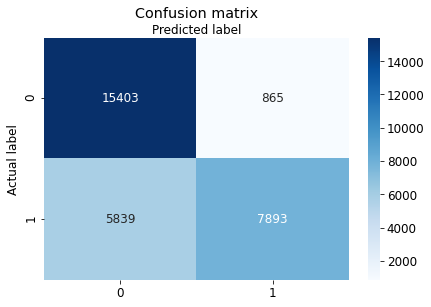

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf_cutoff)
class_names=[1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h4><b> 5.1 Final model </b></h4>
<div style="text-align: justify">
Lastly, to bring this evaluation to an end, a final model should be chosen. It is more than clear that the Random Forest algorithm with a cutoff value of 0.6 is the best performing model, both in terms of the AUC score and the cost sensitivity.

In [ ]:
for i, (train_index, test_index) in enumerate(cv.split(X, y)):                                     
  X_train, y_train = X.iloc[train_index], y[train_index]
  X_test, y_test = X.iloc[test_index], y[test_index]

  rf.fit(X_train, y_train)

In [ ]:
data_Test = dataTest.copy()
data_Test = data_Test.drop(['order_item_id','delivery_month_woe','item_desc_woe'],axis = 1)
test_predict=data_Test
y_pred_prob = rf.predict_proba(test_predict)[:, 1]
y_pred_rf_cutoff = (binarize(y_pred_prob.reshape(-1,1), 0.6))
yhat_df = pd.DataFrame(y_pred_rf_cutoff)
yhat_df.rename(columns={0:"return"})
id_ = dataTest.order_item_id
id_ = pd.DataFrame(id_)
frames = [id_, yhat_df.reindex(id_.index)]
result = pd.concat(frames, axis = 1)
result.rename(columns={0:"return"}, inplace = True)
result.to_csv(r'617258.csv', index = False)

<h3><b> 6. Conclusion </b></h3>
<br>
<div style="text-align: justify"> In conclusion, it was both very interesting and challenging to work with this dataset. While doing the exploratory data analysis I got familiar with the data and thought of ways how to make the existing features more informative. The incosistency between known and unkown data added additional weight to the problem. After the feature engineering, I had new variables to work with and so I was again on a rocky road. To solve the encoding of the categorical variables, I used Weight Of Evidence. Moreover, I  looked at the Information Value to see their predictive power. Low predictive features were not taken into account. Since my goal was to give the models the best predictive features, in addition to the WOE, I have also used Forward Selection. In the end, by using a threshold of 0.6, the Random Forest model did best at obtaining a great accuracy of predicted returns, while, at the same time, it minimized the error cost value. 
</div>



<h3> Sources </h3>
<div style="text-align: justify">    
<br>
[1] - https://www.invespcro.com/blog/ecommerce-product-return-rate-statistics
<br>
[2] - https://magnetoitsolutions.com/infographic/e-commerce-product-return-rate
<br>
[3] - https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
<br>
[4] - https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
<br>
[5] - Cost-Sensitive Learning and the Class Imbalance Problem by Charles X. Ling, Victor S. Sheng
</div>